Video: 1CM1_4_R_#229, first frame: 858, last frame: 899, duration: 41, step: 8


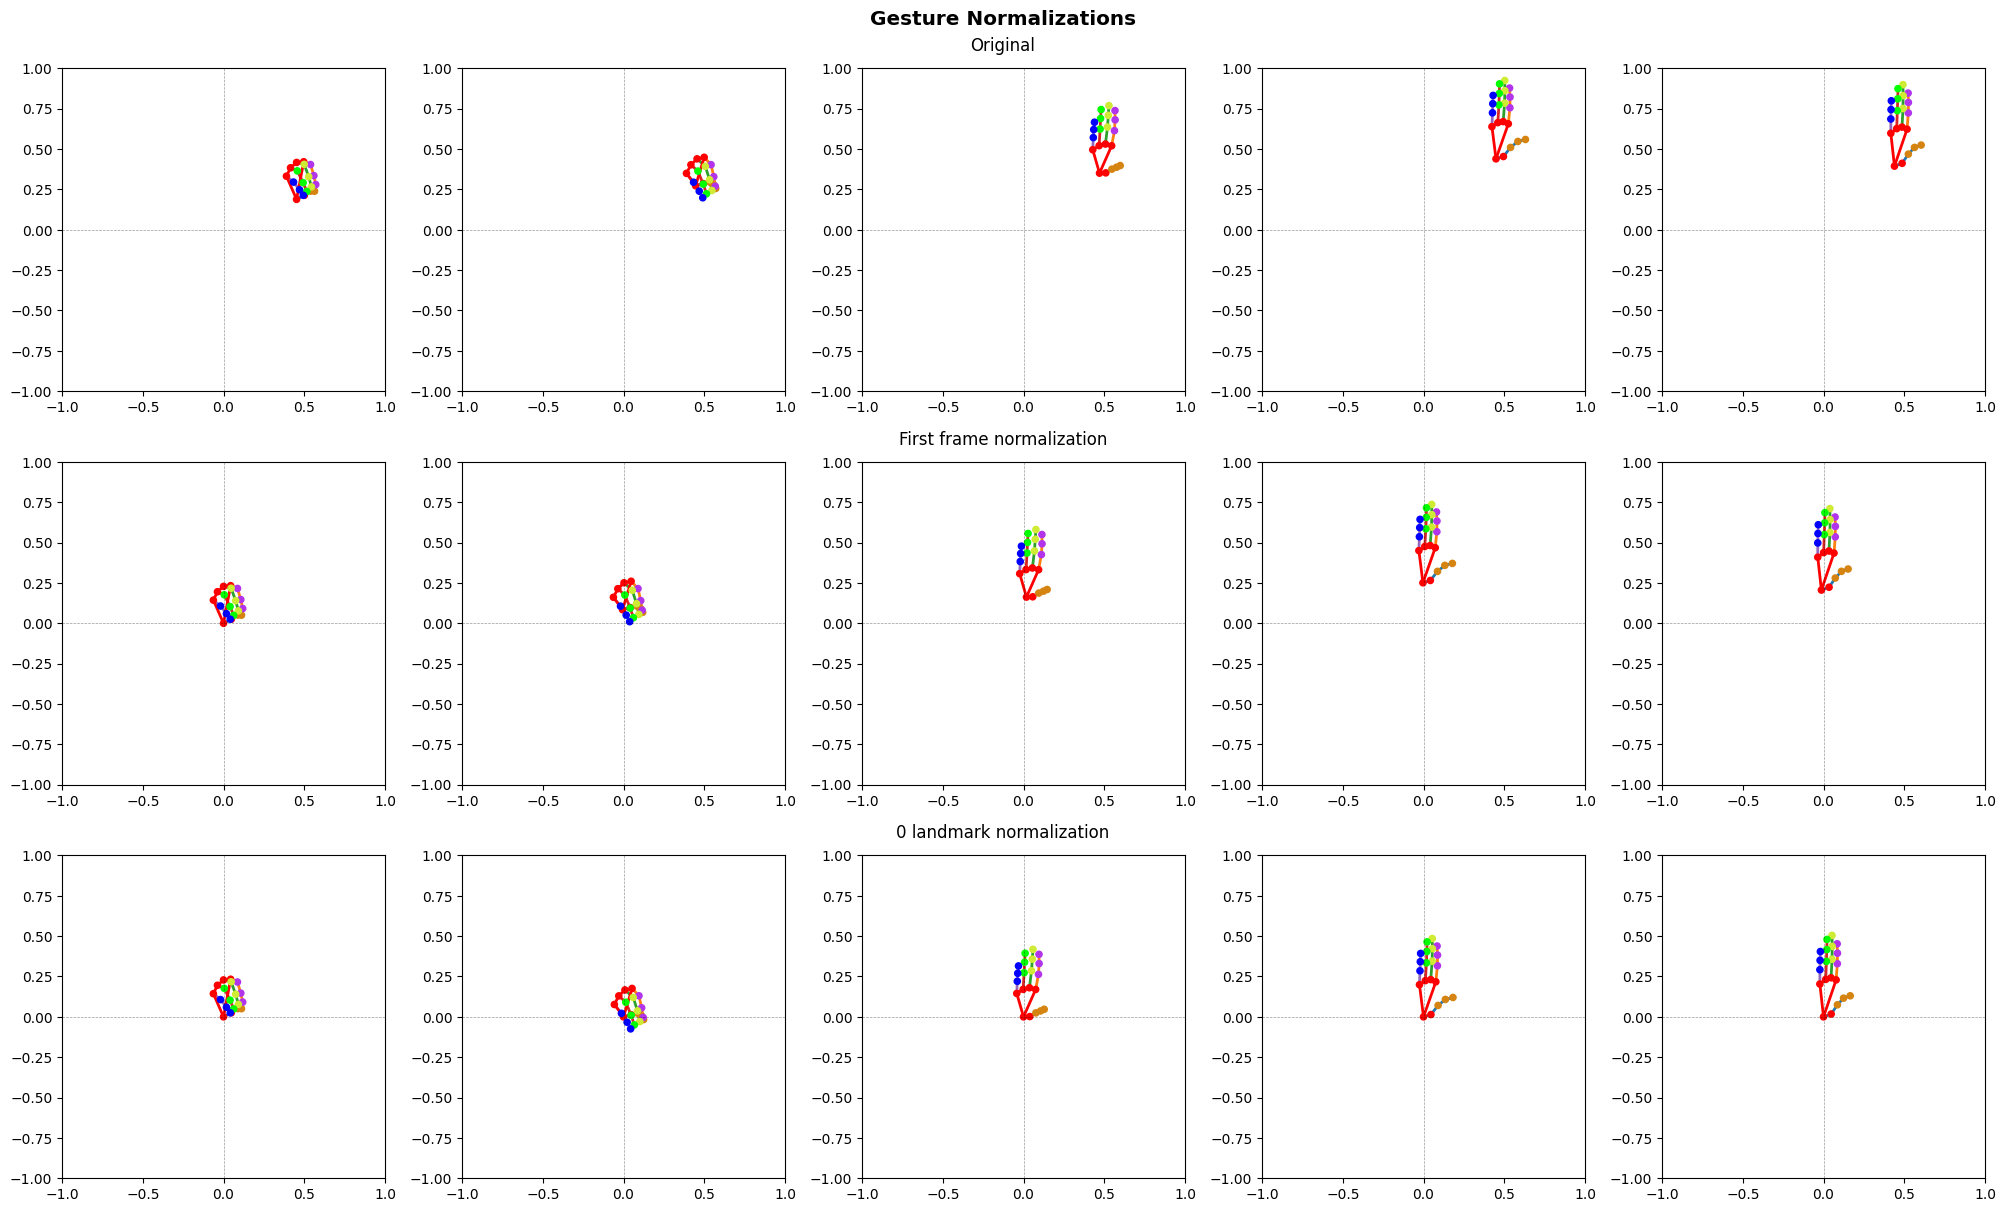

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CONNECTIONS = [
    [(0, 4), (5, 8), (9, 12), (13, 16), (17, 20)],
    [(0, 5), (0, 17), (5, 9), (9, 13), (13, 17)],
]
SCATTER_COLORS = [
    "#ff0000",
    "#ff0000",
    "#d68411",
    "#d68411",
    "#d68411",
    "#ff0000",
    "#b134eb",
    "#b134eb",
    "#b134eb",
    "#ff0000",
    "#cfeb34",
    "#cfeb34",
    "#cfeb34",
    "#ff0000",
    "#00ff00",
    "#00ff00",
    "#00ff00",
    "#ff0000",
    "#0000ff",
    "#0000ff",
    "#0000ff",
]


GESTURE_CLASS = 6

NUMBER_OF_FRAMES = 5

def normalize_from_0_landmark(frames: np.ndarray):
    '''
        Moves the hand so the wrist of each frame is at (0,0)
    '''
    for landmark in frames:
        if landmark.sum() == 0:
            continue;

        if (landmark[0] + landmark[1] != 0):
            x_center = landmark[0]
            y_center = landmark[1]
            for i in range(0,frames.shape[1],2):
                landmark[i] = landmark[i] - x_center
                landmark[i+1] = landmark[i+1] - y_center
    return frames

def normalize_from_first_frame(frames: np.ndarray):
    '''
        Moves the hand of all frames so the wrist of the first frame is at (0,0)
    '''
    if(frames[0,0] + frames[0,1] == 0):
        return frames

    x_center = frames[0,0]
    y_center = frames[0,1]
    for landmarks in frames:
        if landmarks.sum() == 0:
            continue;

        for i in range(0,frames.shape[1],2):
            landmarks[i] = landmarks[i] - x_center
            landmarks[i+1] = landmarks[i+1] - y_center
    return frames


def plot_landmarks(x: np.ndarray, y: np.ndarray, ax: plt.Axes):
    for connection in CONNECTIONS[0]:
        ax.plot(
            x[connection[0] : connection[1] + 1],
            y[connection[0] : connection[1] + 1],
            zorder=0,
            linewidth=2,
        )
    for connection in CONNECTIONS[1]:
        ax.plot(
            [x[connection[0]], x[connection[1]]],
            [y[connection[0]], y[connection[1]]],
            c="#ff0000",
            zorder=0,
            linewidth=2,
        )

    ax.scatter(x, y, c=SCATTER_COLORS, s=20)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    ax.axhline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')
    ax.axvline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')


# Load the data
df = pd.read_csv(
    "/mnt/RESOURCES/josemanuelbravo/GestureRecognitionSystem/data/IPN_Hand/annotations/Annot_TrainList.txt"
)

# Filter the data
df = df[df["label"] == GESTURE_CLASS]

gesture = df.iloc[0]
video_name = gesture["video_name"]
first_frame = gesture["first_frame"]
last_frame = gesture["last_frame"]
duration = last_frame - first_frame
step = duration // NUMBER_OF_FRAMES
print(f"Video: {video_name}, first frame: {first_frame}, last frame: {last_frame}, duration: {duration}, step: {step}")

all_landmarks = pd.read_csv(
    os.path.join(
        "/home/josemanuelbravo/Escritorio/GestureRecognitionSystem/features/IPN_Hand/pose_features_w_interp",
        f"{video_name}_poses_landamarks.csv",
    )
).to_numpy()[first_frame - 1 : last_frame]
all_landmarks_ff = normalize_from_first_frame(np.copy(all_landmarks))
all_landmarks_f0 = normalize_from_0_landmark(np.copy(all_landmarks))

fig = plt.figure(figsize=(20,12), constrained_layout=True)
subfigs = fig.subfigures(nrows=3, ncols=1)

for i, subfig in enumerate(subfigs):
    axs = subfig.subplots(nrows=1, ncols=NUMBER_OF_FRAMES)
    for j in range(NUMBER_OF_FRAMES):
        ax = axs[j]
        frame = j * step
        if i == 0:
            landmarks = all_landmarks[frame]
        elif i == 1:
            landmarks = all_landmarks_ff[frame]
        else:
            landmarks = all_landmarks_f0[frame]
        x = landmarks[::2]
        y = landmarks[1::2]
        plot_landmarks(x, y, ax)

subfigs[0].suptitle("Original")
subfigs[1].suptitle("First frame normalization")
subfigs[2].suptitle("0 landmark normalization")
fig.suptitle("Gesture Normalizations", fontsize="x-large", fontweight="semibold")
fig.show()
